In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
#Generate random noise in our data
X=np.linspace(0,2,num=20)
Y=np.sin(np.pi*X)
for i in range(len(Y)):
    dummy=random.choice([-1,1])
    Y[i]=Y[i]+(dummy*random.random())/4
    

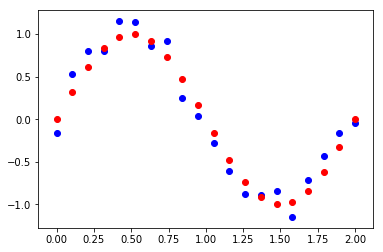

In [18]:
#Visualizing the data
#red points represent sin(pi*x) 
#blue points represent our data( after introducing noise )
plt.scatter(X,Y,c='blue')
plt.scatter(X,np.sin(np.pi*X),c='red')

### When M=1, the program represents linear regression
### When M>1, the program represents polynomial regression

In [5]:
#features cosidering a cubic polynomial for fitting 
#Change M as per requirement
f0= [1]*20
M=3
F=f0
#f1= X
#f2= X**2
#f3= X**3
#F=np.column_stack([f0,f1,f2,f3])
#Generalizing for M degree
for i in range(1,M+1):
    F = np.column_stack([F, X**i])

In [6]:
F

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03],
       [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02],
       [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02],
       [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01],
       [1.00000000e+00, 7.36842105e-01, 5.42936288e-01, 4.00058318e-01],
       [1.00000000e+00, 8.42105263e-01, 7.09141274e-01, 5.97171599e-01],
       [1.00000000e+00, 9.47368421e-01, 8.97506925e-01, 8.50269719e-01],
       [1.00000000e+00, 1.05263158e+00, 1.10803324e+00, 1.16635078e+00],
       [1.00000000e+00, 1.15789474e+00, 1.34072022e+00, 1.55241289e+00],
       [1.00000000e+00, 1.26315789e+00, 1.59556787e+00, 2.01545415e+00],
       [1.00000000e+00, 1.36842105e+00, 1.87257618e

## Using Normal Equation

In [7]:
#Given data we have, w0f0+w1f1+w2f2+w3f3=y
#Using normal equation, we find W=[w0,w1,w2,w3] 
#Normal eqn: (transpose(F)*F)*W = transpose(F)*(Y(column))
tff=np.matmul(np.transpose(F),F)
tff_inv=np.linalg.inv(tff)
W= np.matmul(np.matmul(tff_inv,np.transpose(F)), Y.reshape(20,1))

In [8]:
W

array([[-0.06413729],
       [ 5.72325963],
       [-8.60661124],
       [ 2.91436454]])

In [9]:
#Making gridlines for visualizing our results
xx=np.linspace(0,2,50)
yy=W[0]
#yy=W[0]*1 + W[1]*xx + W[2]*(xx ** 2) + W[3]*(xx**3)
#Generalizing
for i in range(1,len(W)):
    yy=yy+ W[i]*(xx**i)

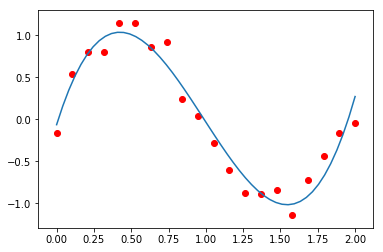

In [10]:
plt.plot(xx,yy)
plt.scatter(X,Y,c='red')

# Using Gradient Descent

In [11]:
#initialize W2
W2=np.ones((M+1,1))

In [12]:
#Calculating Ypredicted
Ypr= np.matmul(F,W2)

In [13]:
#define cost function/ optimization function
costfxn=np.sqrt(((Ypr-Y.reshape(Ypr.shape))**2).sum())

In [14]:
#Gradient Descent step
cost=[costfxn]
for epoch in range(10000):
    Ypr=np.matmul(F,W2)
    W2=W2 - 0.005*np.matmul(np.transpose(F), Ypr-Y.reshape(Ypr.shape))
    cost.append(np.sqrt(((Ypr-Y.reshape(Ypr.shape))**2).sum()))

### Warning
The learning rate 0.005 and the no. of epochs have to e manually selected by trial and error. 
Learning rate must be small enough so that cost doesn't overshoot the minima but big enough for less error within 10000 steps 

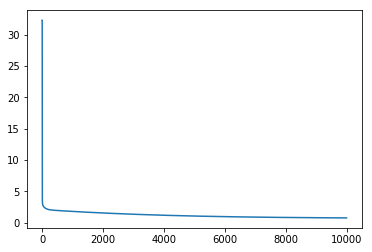

In [15]:
#plotting cost over iteration
plt.plot(np.linspace(1,10001,10001).tolist(),cost)

In [16]:
yy2=0
for i in range(1,len(W2)):
    yy2=yy2+ W2[i]*(xx**i)

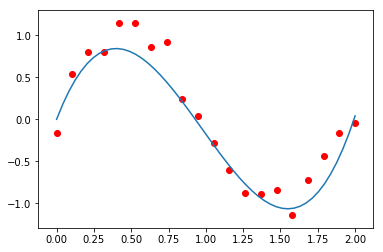

In [17]:
#plotting prediction
plt.plot(xx,yy2)
plt.scatter(X,Y,c='red')